In [189]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import shapiro



In [185]:
# A Function to test if there are any missing values 

def null_NaN_total(input_file, feature):
    data = pd.read_csv(input_file)
    nan_count = data[feature].isna().sum().sum()
    null_count = data[feature].isnull().sum().sum()
    total_missing = nan_count + null_count
    df = pd.DataFrame(data)
    shape = df.shape
    num_rows = shape[0]
    num_columns = shape[1]
    
    return f"Number of missing values for {feature}:", total_missing, num_rows, f"%: {total_missing/num_rows*100}"

#null_NaN_total('standardized.csv', 'runtime')

print(null_NaN_total('standardized.csv', 'release_year'))

print(null_NaN_total('standardized.csv', 'runtime'))

print(null_NaN_total('standardized.csv', 'genres'))


('Number of missing values for release_year:', 0, 3744, '%: 0.0')
('Number of missing values for runtime:', 0, 3744, '%: 0.0')
('Number of missing values for genres:', 0, 3744, '%: 0.0')


There is no missing data for runtime nor genres nor release year

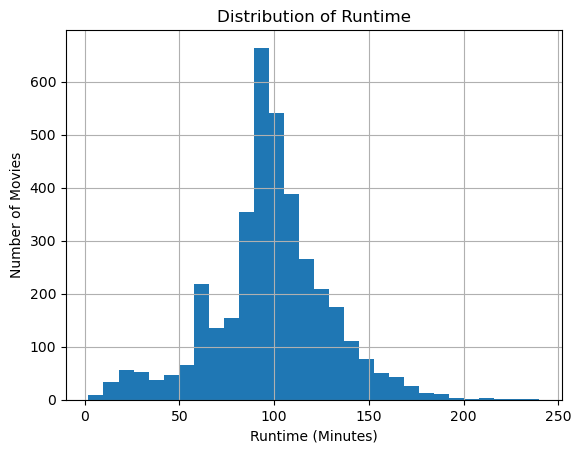

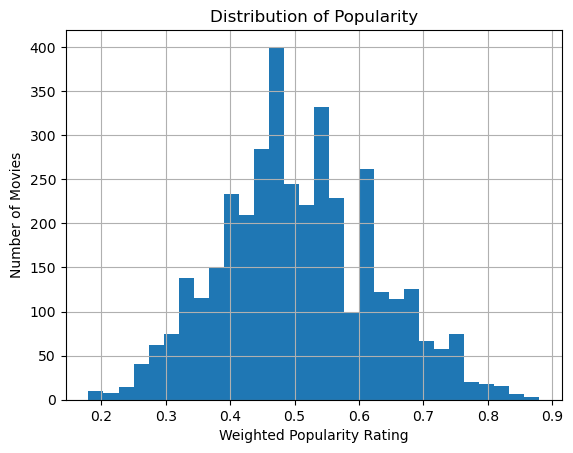

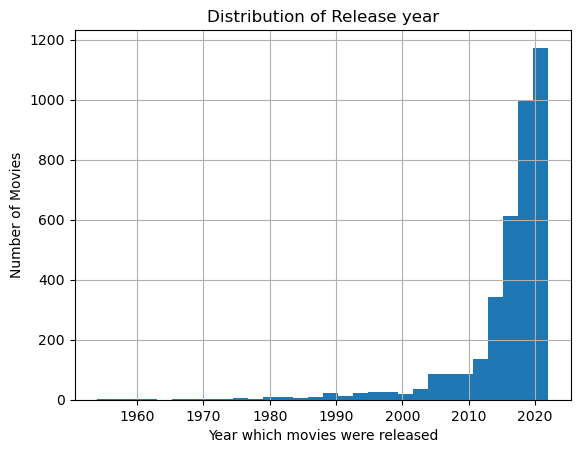

In [113]:
#Histogram of distribution for Runtime, Release year and Movie popularity

data = pd.read_csv('standardized.csv')
popularity = data.weighted_average_popularity
runtime = data.runtime
year = data.release_year

runtime.hist(bins=30)
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Runtime')
plt.show()

popularity.hist(bins=30)  
plt.xlabel('Weighted Popularity Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Popularity')
plt.show()

year.hist(bins=30)  
plt.xlabel('Year which movies were released')
plt.ylabel('Number of Movies')
plt.title('Distribution of Release year')
plt.show()

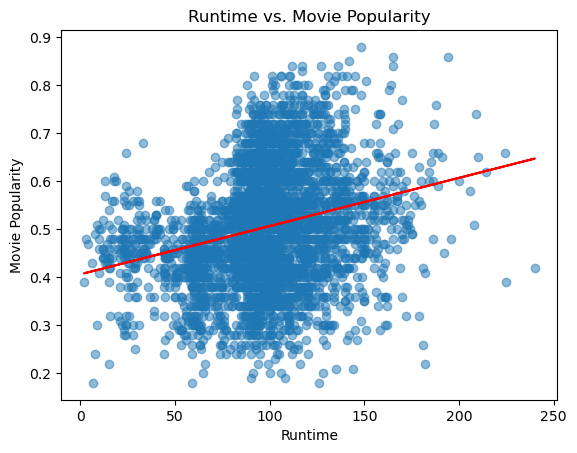

In [187]:
# Since runtime and popularity are both normally distributed we scatter plot the data to see if they have any linear relationship.

data = pd.read_csv('standardized.csv')
y=data['weighted_average_popularity']
x=data['runtime']

plt.scatter(x, y, alpha=0.5)
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='red', label='Line of Best Fit')
plt.ylabel('Movie Popularity')
plt.xlabel('Runtime')
plt.title('Runtime vs. Movie Popularity')
plt.show()


In [186]:
# Since the data for runtime and popularity is normally distributed and have linear relationship,
# We calculate the Pearson-R between movie polularity and Runtime
Features = ['weighted_average_popularity', 'runtime']

data[Features].corr(method='pearson')

,weighted_average_popularity,runtime
weighted_average_popularity,1.000000,0.255711
runtime,0.255711,1.000000


Pearson R correlation is 0.255711 between runtime, since it is below 0.3, it's determined that there is small positive correlation between runtime and weighted_average_popularity

In [221]:
#Mutual Information calcualtion for release year and weighted average population

data = pd.read_csv('standardized.csv')

# calculate the mutual information
x = data[["release_year"]]
y = data["weighted_average_popularity"]

mi = mutual_info_regression(x, y)
print(mi)

[0.05497179]


Weak to no relationship between release_year and popularity based on normalized mutual information

In [119]:
# Multi hot encoding for movie genre
# First converted string value in genre to list and exported to updated_genres.csv, then multi hot coded into multi_hot_encoded.csv

data = pd.read_csv('standardized.csv')

for i in range(0, data.shape[0]):

        current_genre = data.loc[i, 'genres']
        current_genre = eval(current_genre)
        data.at[i, 'genres'] = current_genre
        
data.to_csv('updated_genres.csv', index=False)

df = pd.read_csv('updated_genres.csv')

mlb = MultiLabelBinarizer()
encoder = OneHotEncoder(sparse=False)
multi_hot_encoded = pd.DataFrame(mlb.fit_transform(data['genres']), columns=mlb.classes_)
multi_hot_encoded['popularity'] = data['weighted_average_popularity']
multi_hot_encoded.to_csv('multi_hot_encoded_genres.csv', index=False)

print(multi_hot_encoded)


      action  animation  comedy  crime  documentation  drama  european  \
0          0          0       0      1              0      1         0   
1          1          0       0      0              0      1         1   
2          1          0       1      0              0      0         0   
3          1          0       0      0              0      0         0   
4          0          0       1      0              0      0         0   
...      ...        ...     ...    ...            ...    ...       ...   
3739       0          0       0      0              0      0         0   
3740       0          0       0      0              0      1         0   
3741       0          0       0      0              0      1         0   
3742       0          0       1      0              0      0         0   
3743       0          0       0      0              0      0         0   

      family  fantasy  history  horror  music  reality  romance  scifi  sport  \
0          0        0        0

MSE: 0.011354475045306794
RMSE: 0.10655737912179895
R-squared: 0.17745200873202527
          Feature  Coefficient
10         horror     0.065109
14          scifi     0.057754
8         fantasy     0.055419
18        western     0.050873
9         history     0.048843
3           crime     0.046732
17            war     0.044180
15          sport     0.041159
0          action     0.038669
16       thriller     0.037992
6        european     0.028393
13        romance     0.023308
5           drama     0.016173
11          music     0.014750
2          comedy     0.012234
7          family     0.009452
12        reality    -0.004040
4   documentation    -0.006238
1       animation    -0.010492


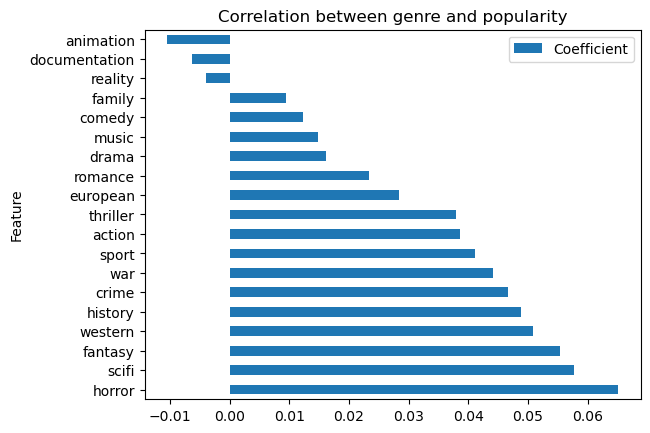

In [173]:
# Genre Linear Regression ML and evalulation for genre vs. popularity with a graph.

data = pd.read_csv('multi_hot_encoded_genres.csv')

y = data['popularity']
X = data.drop('popularity', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20008)

model = LinearRegression()
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r_squared = model.score(X_test, y_test)


print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importances)

feature_importances.plot.barh(x='Feature', y='Coefficient', title="Correlation between genre and popularity")

plt.show()
